In [5]:
import torch
import torch.nn as nn
import sys

sys.path.append("..")
from dcgan.utils import Config, preview, get_dataloader, init_weights
from dcgan.model import Generator, Discriminator

# Config/ Train Setup

device:  cpu


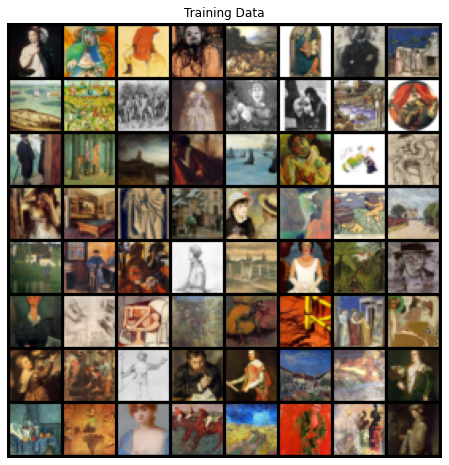

In [19]:
from dcgan.utils import Config, preview, get_dataloader

### CONFIG
c = Config()
c.DATA_DIR="../data/images/images"
c.N_EPOCHS = 5
c.BATCH_SIZE = 128#128
c.IM_SIZE = 32
c.N_Z = 100
c.N_GF = 64
c.N_DF = 64
c.LEARNING_RATE = 3e-4
c.BETA_1 = 0.5
print("device: ", c.DEVICE)

### DATALOADER
dataloader = get_dataloader(c.DATA_DIR, c.BATCH_SIZE, c.IM_SIZE)
real_batch = next(iter(dataloader))
preview(real_batch[0])

### Saved model paths
if not os.path.exists("../data/weights"):
    os.mkdir("../data/weights")
    
gen_path = "../data/weights/gen_{}.pth"
dis_path = "../data/weights/dis_{}.pth"

# Init Models

In [20]:
### Init Gernerator and Discriminator
import torch
import torch.nn as nn
from dcgan.model import Generator, Discriminator
from dcgan.utils import init_weights

netG = Generator(c.N_Z, c.N_CHAN, c.N_GF, c.IM_SIZE).to(c.DEVICE)
_ = netG.apply(init_weights)
# netG.load_state_dict(torch.load(gen_path.format(int(c.IM_SIZE/2))))

netD = Discriminator(c.N_CHAN, c.N_DF, c.IM_SIZE).to(c.DEVICE)
_ = netD.apply(init_weights)
# netD.load_state_dict(torch.load(dis_path.format(int(c.IM_SIZE/2))))

### Loss and optimizer
criterion = nn.BCELoss()

lr = c.LEARNING_RATE
beta1 = c.BETA_1
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

ConvTranspose2d BatchNorm2d ReLU TransposeBlock ConvTranspose2d BatchNorm2d ReLU TransposeBlock ConvTranspose2d BatchNorm2d ReLU TransposeBlock ConvTranspose2d BatchNorm2d ReLU TransposeBlock ConvTranspose2d BatchNorm2d ReLU TransposeBlock ConvTranspose2d BatchNorm2d ReLU TransposeBlock ConvTranspose2d BatchNorm2d ReLU TransposeBlock ConvTranspose2d BatchNorm2d ReLU TransposeBlock Conv2d Tanh Generator Conv2d LeakyReLU ConvBlock Conv2d LeakyReLU BatchNorm2d ConvBlock Conv2d LeakyReLU BatchNorm2d ConvBlock Conv2d LeakyReLU BatchNorm2d ConvBlock Conv2d LeakyReLU BatchNorm2d ConvBlock Conv2d LeakyReLU BatchNorm2d ConvBlock Conv2d LeakyReLU BatchNorm2d ConvBlock Conv2d Sigmoid Discriminator 

# Training

In [21]:
from dcgan.train import train_step, print_stats
# from dcgan.train import  print_stats
c.N_EPOCHS = 50
noise = torch.randn(c.BATCH_SIZE, c.N_Z, 1, 1, device=c.DEVICE)

def save_model(model,file_name):
#     model = model.to('cpu')
    torch.save(model.state_dict(),file_name)
    
def train(dataloader, netG, netD, optimizerG, optimizerD, criterion, c):
    for e in range(c.N_EPOCHS):
        for i, data in enumerate(dataloader, 0):
            errD, errG, D_x, D_G_z1, D_G_z2 = train_step(
                i, data, netG, netD, optimizerG, optimizerD, criterion, c
            )

            if i % 1 == 0:
                print_stats(
                    e, c.N_EPOCHS, i, len(dataloader), errD, errG, D_x, D_G_z1, D_G_z2
                )

        if e % 5 == 0: 
            save_model(netG, gen_path.format(c.IM_SIZE))
            save_model(netD, dis_path.format(c.IM_SIZE))
            fake = netG(noise).detach().cpu()
            preview(fake)

train(dataloader, netG, netD, optimizerG, optimizerD, criterion, c)

[0/50][0/69]	Loss D: 2.0866	Loss G: 7.9871	D(x): 0.5903	D(G(z)): 0.6022 / 0.0008
[0/50][1/69]	Loss D: 5.4560	Loss G: 4.9704	D(x): 0.7222	D(G(z)): 0.9764 / 0.0201
[0/50][2/69]	Loss D: 4.4407	Loss G: 8.1566	D(x): 0.8345	D(G(z)): 0.9577 / 0.0010
[0/50][3/69]	Loss D: 2.2055	Loss G: 11.1626	D(x): 0.8402	D(G(z)): 0.7690 / 0.0000
[0/50][4/69]	Loss D: 1.4105	Loss G: 11.5873	D(x): 0.8779	D(G(z)): 0.5783 / 0.0000
[0/50][5/69]	Loss D: 2.3955	Loss G: 13.0944	D(x): 0.7909	D(G(z)): 0.7675 / 0.0000
[0/50][6/69]	Loss D: 1.9088	Loss G: 15.1819	D(x): 0.7304	D(G(z)): 0.6416 / 0.0000


KeyboardInterrupt: 

In [23]:
save_model(netG, gen_path.format(c.IM_SIZE))
save_model(netD, dis_path.format(c.IM_SIZE))